# Imports and Downloads

In [7]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [5]:
import os
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/LightGCN')

Mounted at /content/gdrive


In [2]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

--2023-12-12 21:53:58--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  2.31MB/s    in 0.4s    

2023-12-12 21:53:59 (2.31 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [3]:
movies_df = pd.read_csv('ml-latest-small/movies.csv')
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
tags_df = pd.read_csv('ml-latest-small/tags.csv')
links_df = pd.read_csv('ml-latest-small/links.csv')

In [ ]:
amazon_url = "https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Movies_and_TV.csv"
amazon_headings = ['item', 'user', 'rating', 'timestamp']
amazon_df = pd.read_csv(amazon_url, header=None, names=amazon_headings)

In [8]:
path = "recommenders/datasets/amazon-book/"
train_file = path + '/train.txt'
data = []


with open(train_file) as f:
    for l in f.readlines()[:2000]: # take first 2000 users
        if len(l) > 0:
            l = l.strip('\n').split(' ')
            items = [int(i) for i in l[1:]]
            uid = int(l[0])
            for item_id in items:
                timestamp = random.randint(100000000, 999999999)
                data.append([uid, item_id, 5.0, timestamp])

amazon_df = pd.DataFrame(data, columns=['userID', 'itemID', 'rating', 'timestamp'])

# Data Exploration

## MovieLens Dataset

In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings_df['userId'].nunique()

610

In [ ]:
ratings_df['movieId'].nunique()

9724

In [ ]:
# Calculating the average rating given by each user
user_avg_ratings = ratings_df.groupby('userId')['rating'].mean()

# sns.set_style("whitegrid")
# # Plotting the distribution of average ratings given by users
# plt.figure(figsize=(12,6))
# sns.histplot(user_avg_ratings, bins=30, kde=True, color='salmon')
# plt.title('Distribution of Average Ratings Given by Users')
# plt.xlabel('Average Rating')
# plt.ylabel('Number of Users')
# plt.show()

In [ ]:
# Calculating the number of ratings given by each user
new_user_rating_counts = ratings_df.groupby('userId')['rating'].count()

# # Plotting the distribution of the number of ratings per user
# plt.figure(figsize=(12,6))
# sns.histplot(new_user_rating_counts, bins=50, kde=True, color='skyblue')
# plt.title('Distribution of Number of Ratings per User')
# plt.xlabel('Number of Ratings')
# plt.ylabel('Number of Users')
# plt.show()

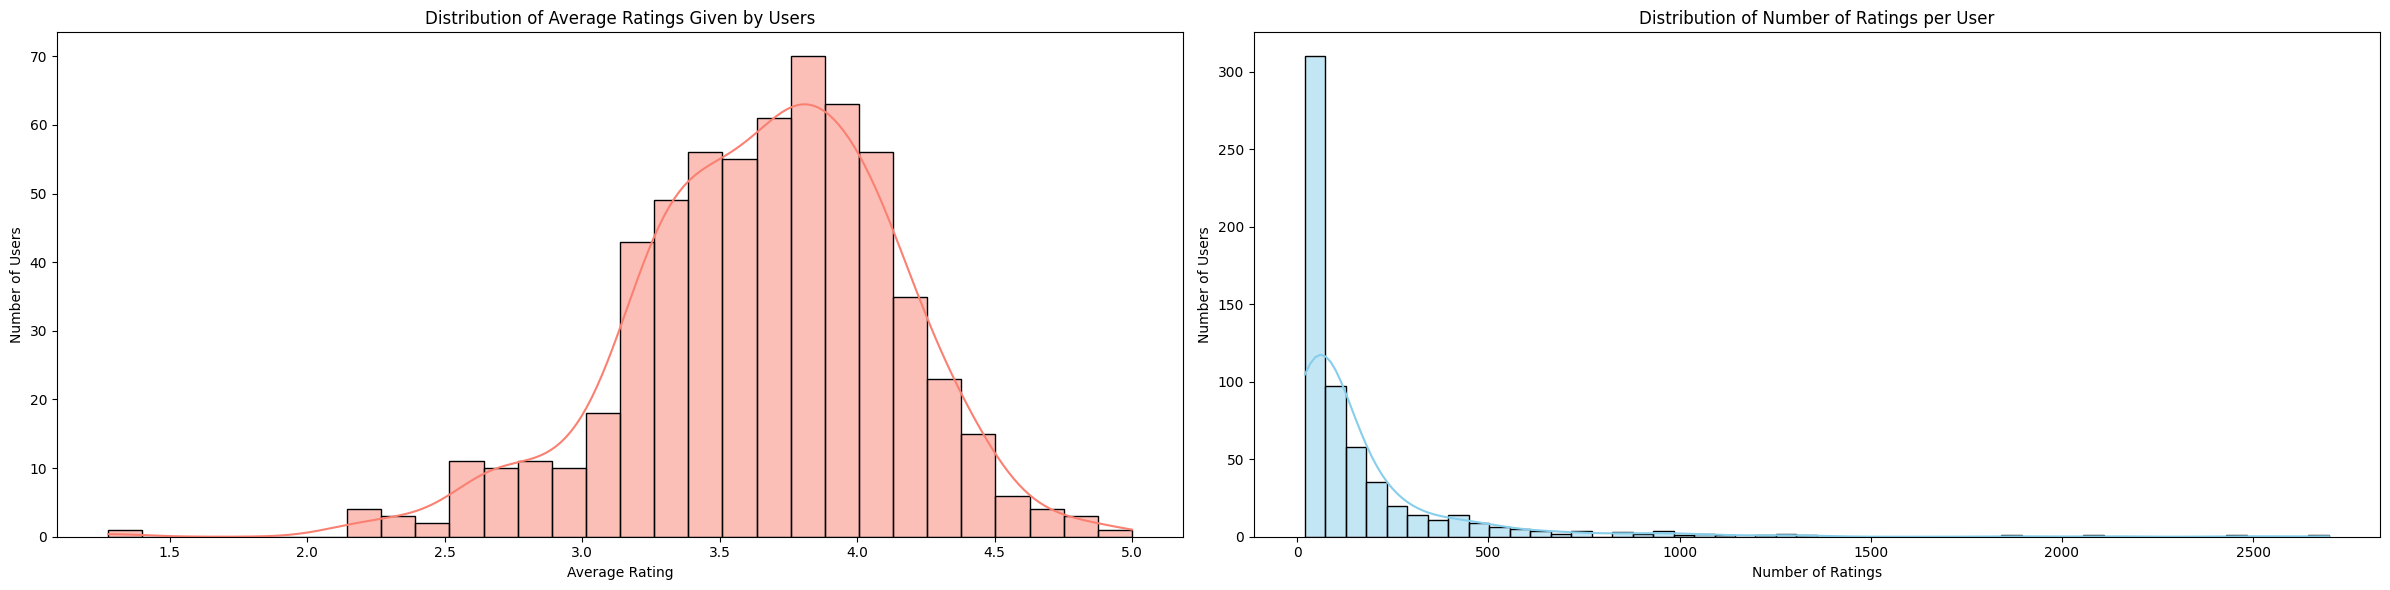

In [ ]:
# Creating a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Plotting the distribution of average ratings given by users on the left subplot
sns.histplot(user_avg_ratings, bins=30, kde=True, color='salmon', ax=axes[0])
axes[0].set_title('Distribution of Average Ratings Given by Users')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Number of Users')

# Plotting the distribution of the number of ratings per user on the right subplot
sns.histplot(new_user_rating_counts, bins=50, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of Number of Ratings per User')
axes[1].set_xlabel('Number of Ratings')
axes[1].set_ylabel('Number of Users')

# Adjusting the layout to ensure no overlaps
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the average rating received by each movie
movie_avg_ratings = ratings_df.groupby('movieId')['rating'].mean()

# Plotting the distribution of average ratings received by movies
# plt.figure(figsize=(12,6))
# sns.histplot(movie_avg_ratings, bins=30, kde=True, color='teal')
# plt.title('Distribution of Average Ratings Received by Movies')
# plt.xlabel('Average Rating')
# plt.ylabel('Number of Movies')
# plt.show()

In [ ]:
# Calculating the number of ratings received by each movie
new_movie_rating_counts = ratings_df.groupby('movieId')['rating'].count()

# Plotting the distribution of the number of ratings received by movies
# plt.figure(figsize=(12,6))
# sns.histplot(new_movie_rating_counts, bins=50, kde=True, color='salmon')
# plt.title('Distribution of Number of Ratings Received by Movies')
# plt.xlabel('Number of Ratings Received')
# plt.ylabel('Number of Movies')
# plt.show()

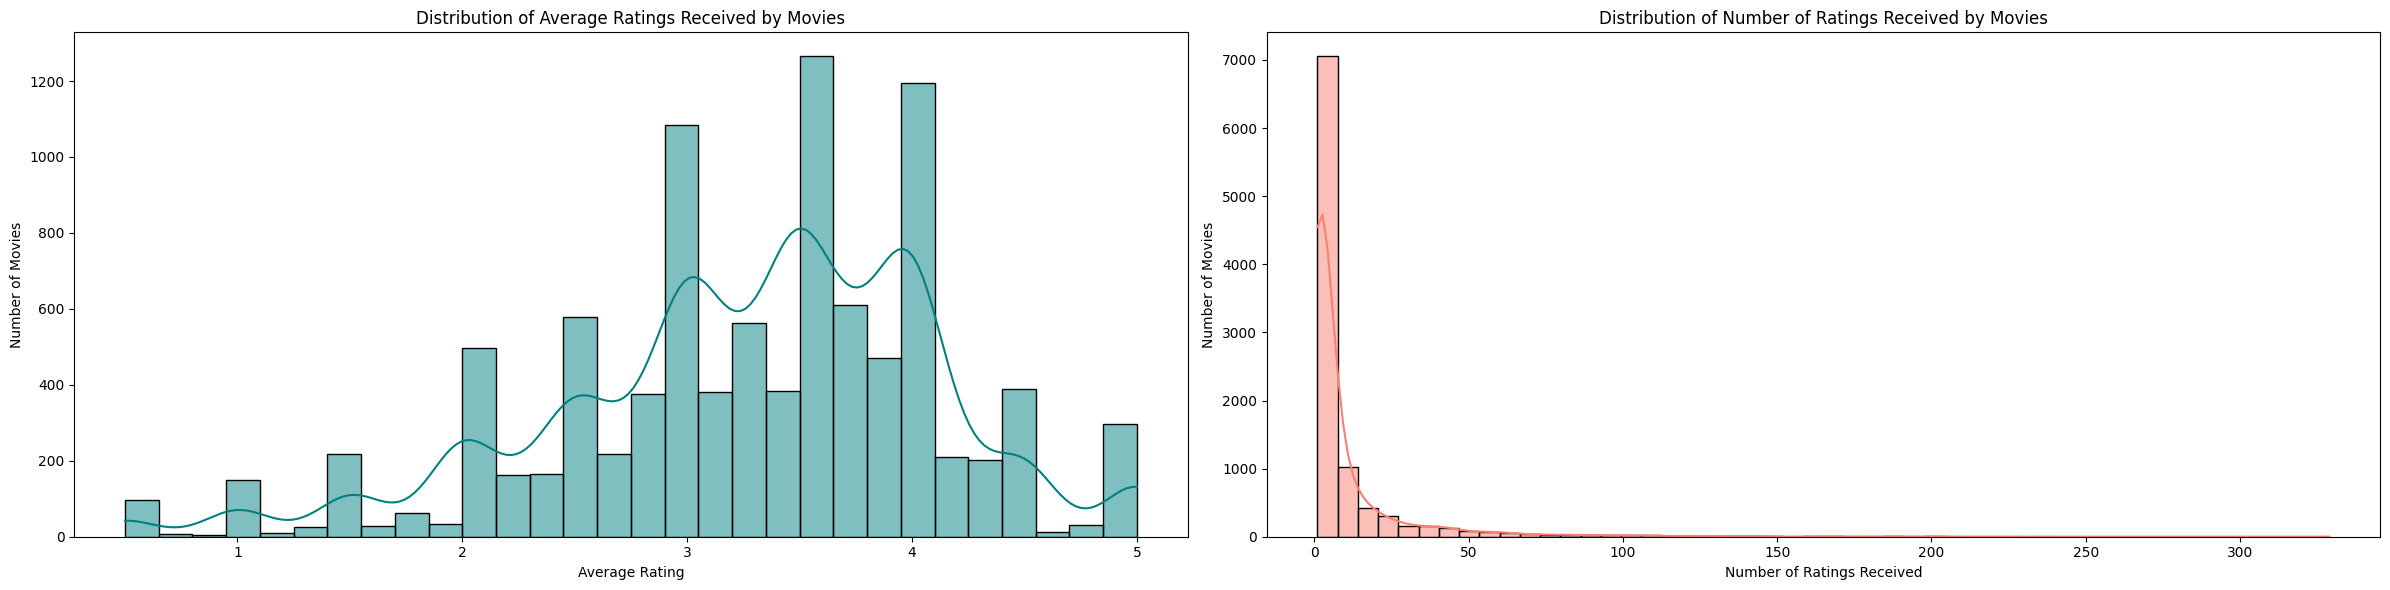

In [ ]:
# Creating a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Plotting the distribution of average ratings received by movies on the left subplot
sns.histplot(movie_avg_ratings, bins=30, kde=True, color='teal', ax=axes[0])
axes[0].set_title('Distribution of Average Ratings Received by Movies')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Number of Movies')

# Plotting the distribution of the number of ratings received by movies on the right subplot
sns.histplot(new_movie_rating_counts, bins=50, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribution of Number of Ratings Received by Movies')
axes[1].set_xlabel('Number of Ratings Received')
axes[1].set_ylabel('Number of Movies')

# Adjusting the layout to ensure no overlaps
plt.tight_layout()
plt.show()

In [ ]:
# Total possible interactions (assuming every user rated every movie)
total_possible_interactions = len(ratings_df['userId'].unique()) * len(ratings_df['movieId'].unique())

# Actual interactions in the dataset
actual_interactions = len(ratings_df)

# Calculating the sparsity
sparsity = (1 - (actual_interactions / total_possible_interactions)) * 100
sparsity

98.30003169443864

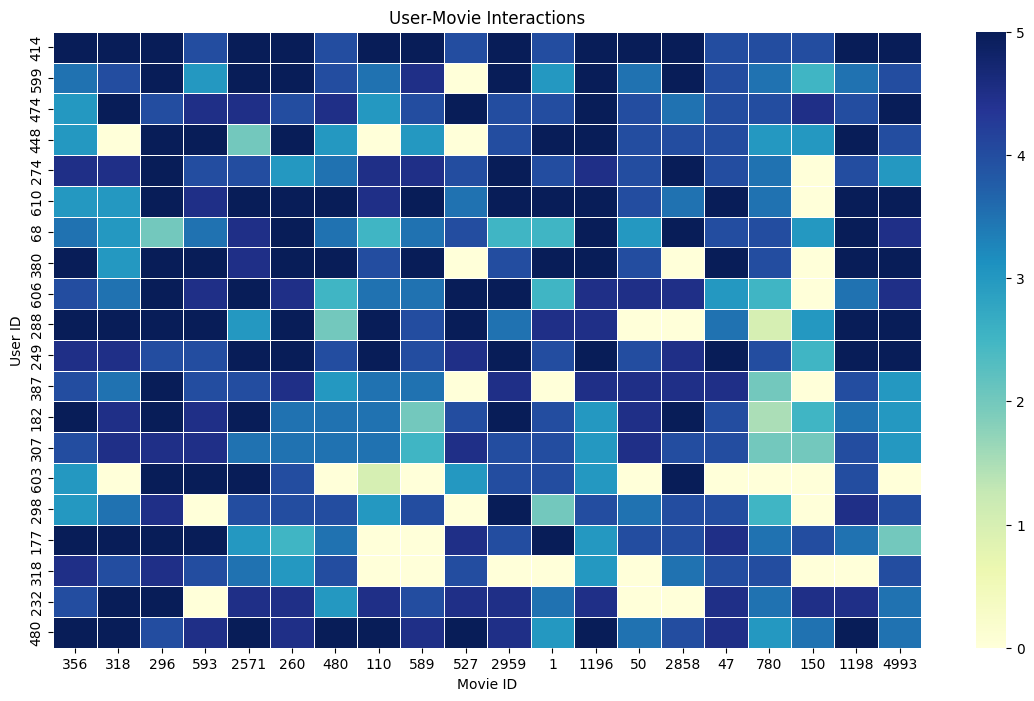

In [ ]:
# Calculating the number of ratings given by each user
user_rating_counts = ratings_df.groupby('userId')['rating'].count()
# Calculating the number of ratings received by each movie
movie_rating_counts = ratings_df.groupby('movieId')['rating'].count()

# Creating a subset of the data for visualization
subset_users = user_rating_counts.sort_values(ascending=False).head(20).index
subset_movies = movie_rating_counts.sort_values(ascending=False).head(20).index

# Creating a user-movie interaction matrix for the subset
interaction_matrix_subset = ratings_df.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)
interaction_matrix_subset = interaction_matrix_subset.loc[subset_users, subset_movies]

# Plotting the heatmap
plt.figure(figsize=(14,8))
sns.heatmap(interaction_matrix_subset, cmap='YlGnBu', linewidths=.5)
plt.title('User-Movie Interactions')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()


In [ ]:
# Group by user and count unique items for each user
user_item_counts = ratings_df.groupby('userId')['movieId'].nunique()

# Filter out users who have reviewed only one item
single_item_reviewers = user_item_counts[user_item_counts > 100].count()

# Compute the percentage of these users relative to the total number of unique users
percentage_single_item_reviewers = (single_item_reviewers / len(user_item_counts)) * 100
percentage_single_item_reviewers

40.16393442622951

In [ ]:
min(user_item_counts)

20

In [ ]:
len(ratings_df)

100836

## Amazon Dataset

In [9]:
amazon_df.head()

,userID,itemID,rating,timestamp
0,0,0,5.0,864437376
1,0,1,5.0,752680559
2,0,2,5.0,835163786
3,0,3,5.0,449296991
4,0,4,5.0,778278761


In [ ]:
# subset_data = amazon_df.iloc[:5000, :]  # Select the first 1000 rows
# subset_data.to_csv('a.csv', index=False)  # Save to new CSV file

In [11]:
# Number of unique users
num_users = amazon_df['userID'].nunique()

# Number of unique items
num_items = amazon_df['itemID'].nunique()

num_users, num_items

(2000, 43755)

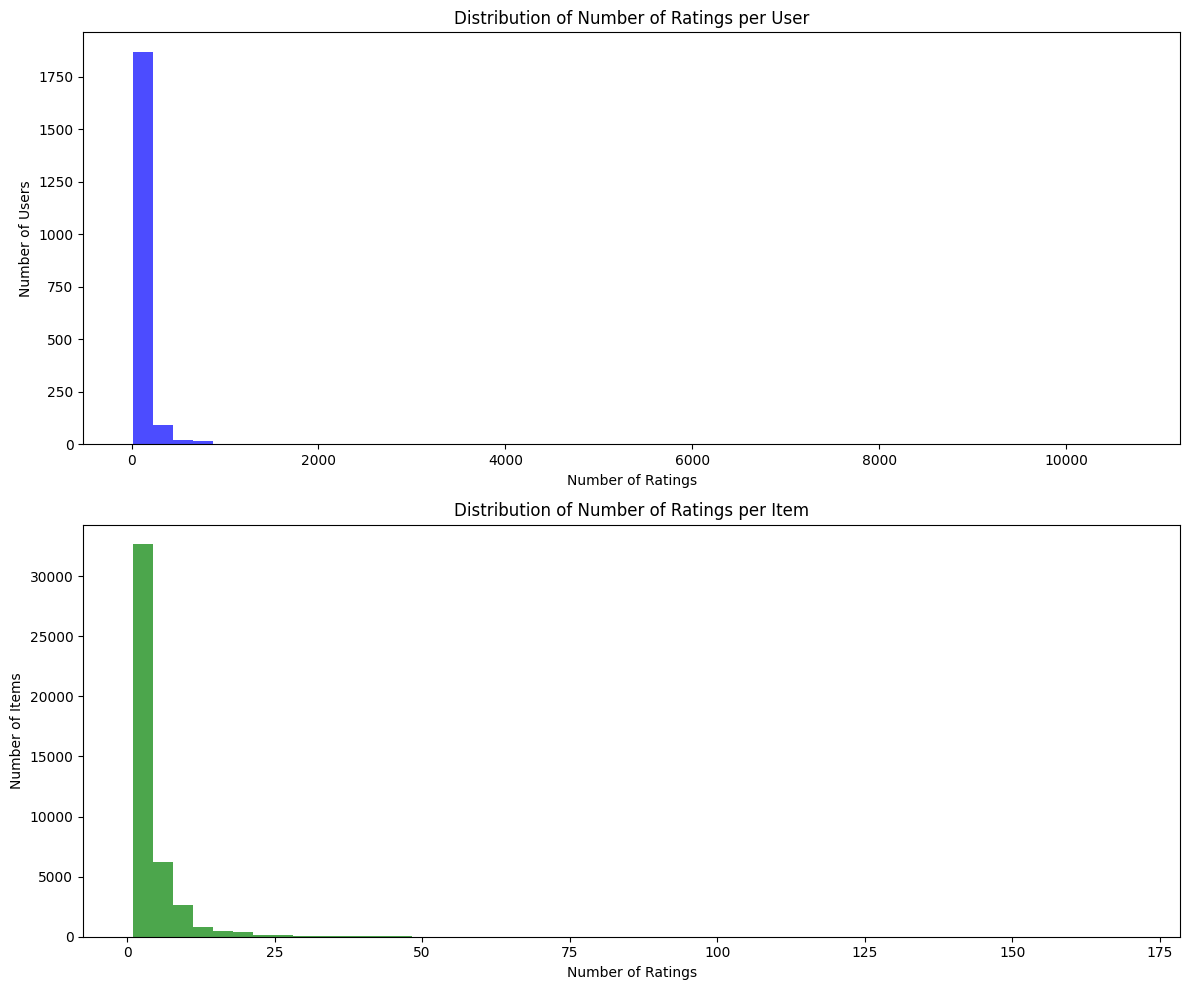

In [12]:
# Distribution of number of ratings per user
user_rating_counts = amazon_df['userID'].value_counts()
item_rating_counts = amazon_df['itemID'].value_counts()

# Set up subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot distribution of number of ratings per user
ax[0].hist(user_rating_counts, bins=50, color='blue', alpha=0.7)
ax[0].set_title('Distribution of Number of Ratings per User')
ax[0].set_xlabel('Number of Ratings')
ax[0].set_ylabel('Number of Users')

# Plot distribution of number of ratings per item
ax[1].hist(item_rating_counts, bins=50, color='green', alpha=0.7)
ax[1].set_title('Distribution of Number of Ratings per Item')
ax[1].set_xlabel('Number of Ratings')
ax[1].set_ylabel('Number of Items')

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-13-88f4ded06b82>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['Users'])
<ipython-input-13-88f4ded06b82>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['Items'])


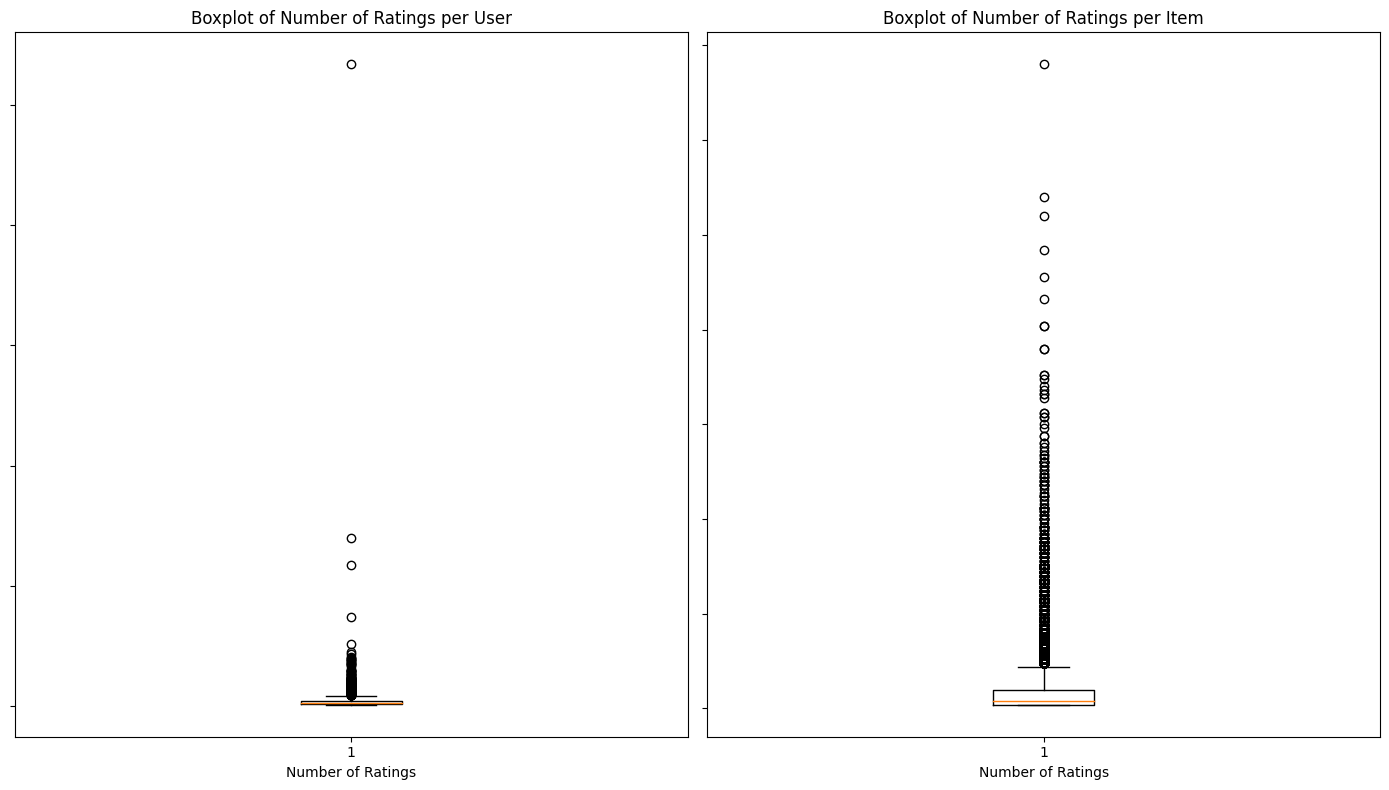

In [13]:
# Set up subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Boxplot for distribution of number of ratings per user
ax[0].boxplot(user_rating_counts, vert=True)
ax[0].set_title('Boxplot of Number of Ratings per User')
ax[0].set_xlabel('Number of Ratings')
ax[0].set_yticklabels(['Users'])

# Boxplot for distribution of number of ratings per item
ax[1].boxplot(item_rating_counts, vert=True)
ax[1].set_title('Boxplot of Number of Ratings per Item')
ax[1].set_xlabel('Number of Ratings')
ax[1].set_yticklabels(['Items'])

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
# Total possible interactions (assuming every user rated every movie)
total_possible_interactions = len(amazon_df['userID'].unique()) * len(amazon_df['itemID'].unique())

# Actual interactions in the dataset
actual_interactions = len(amazon_df)

# Calculating the sparsity
sparsity = (1 - (actual_interactions / total_possible_interactions)) * 100
sparsity

99.80348988687007

In [16]:
# Group by user and count unique items for each user
user_item_counts = amazon_df.groupby('userID')['itemID'].nunique()

# Filter out users who have reviewed only one item
single_item_reviewers = user_item_counts[user_item_counts > 100].count()

# Compute the percentage of these users relative to the total number of unique users
percentage_single_item_reviewers = (single_item_reviewers / len(user_item_counts)) * 100
percentage_single_item_reviewers

20.0

In [17]:
len(amazon_df)

171966

In [18]:
# Calculating the number of ratings given by each user
user_rating_counts = amazon_df.groupby('userID')['rating'].count()
# Calculating the number of ratings received by each movie
movie_rating_counts = amazon_df.groupby('itemID')['rating'].count()

# Creating a subset of the data for visualization
subset_users = user_rating_counts.sort_values(ascending=False).head(20).index
subset_movies = movie_rating_counts.sort_values(ascending=False).head(20).index

# Creating a user-movie interaction matrix for the subset
# interaction_matrix_subset = amazon_df.pivot_table(index='user', columns='item', values='rating', fill_value=0)
# interaction_matrix_subset = interaction_matrix_subset.loc[subset_users, subset_movies]

# # Plotting the heatmap
# plt.figure(figsize=(14,8))
# sns.heatmap(interaction_matrix_subset, cmap='YlGnBu', linewidths=.5)
# plt.title('User-Item Interactions')
# plt.xlabel('Item ID')
# plt.ylabel('User ID')
# plt.show()

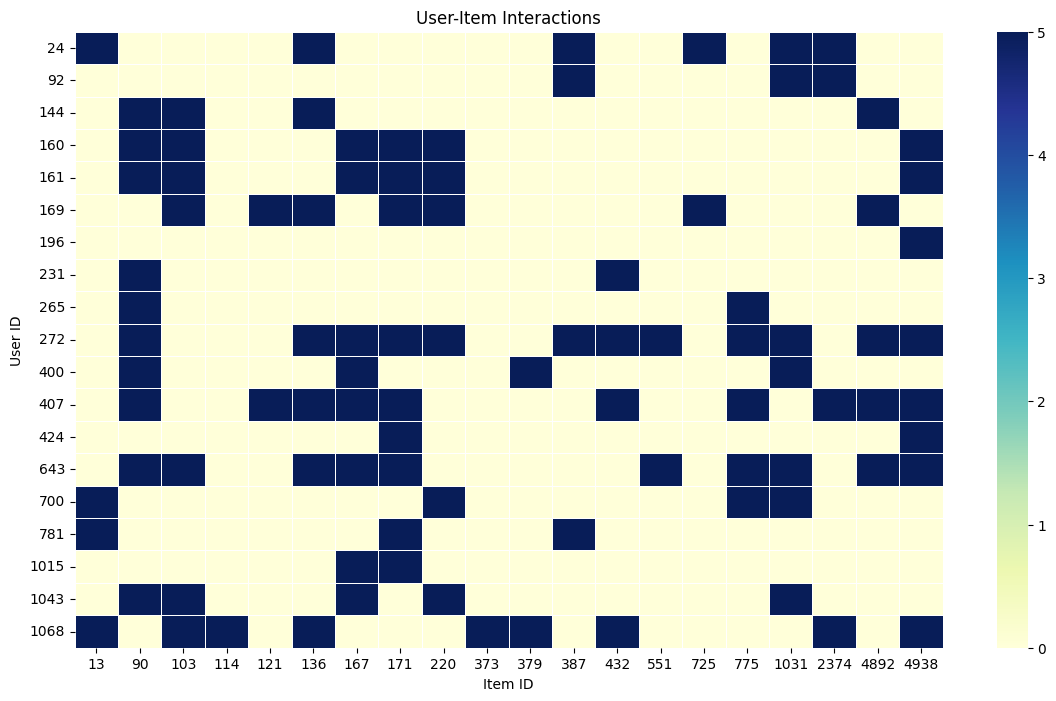

In [20]:
# Calculating the number of ratings given by each user
user_rating_counts = amazon_df.groupby('userID')['rating'].count()
# Calculating the number of ratings received by each movie
movie_rating_counts = amazon_df.groupby('itemID')['rating'].count()

# Calculate the top 20 users and top 20 movies.
subset_users = user_rating_counts.sort_values(ascending=False).head(20).index
subset_movies = movie_rating_counts.sort_values(ascending=False).head(20).index

# Filter the dataset for the top users and movies.
subset_data = amazon_df[(amazon_df['userID'].isin(subset_users)) & (amazon_df['itemID'].isin(subset_movies))]

# Create the pivot table with the reduced dataset.
interaction_matrix_subset = subset_data.pivot_table(index='userID', columns='itemID', values='rating', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(14,8))
sns.heatmap(interaction_matrix_subset, cmap='YlGnBu', linewidths=.5)
plt.title('User-Item Interactions')
plt.xlabel('Item ID')
plt.ylabel('User ID')
plt.show()
